<div style="padding:20px;
            color:black;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">Customer Personality Analysis</div>

**DataSet Link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis**

### `Import Libraries`

In [1]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler

## decomposition
from sklearn.decomposition import PCA

## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `Load Data`

In [2]:
data = pd.read_csv("output/03_features_engineered.csv")

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Data Preparation for ML Model
</div>

- Label encoding 
- Scaling
- Dimensionality Reduction

In [3]:
## create copy from data
df_final = data.copy()

In [4]:
## Select Categorical Columns 
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(categorical_cols)

['Education', 'Marital_status', 'Dt_customer', 'Children', 'Has_child', 'customer_month', 'day_name', 'Age_Group']


## <b>4.1 <span style='color:#682F2F'> Encoding </span></b>

**Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.**
- Source : https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [5]:
label_encoding = LabelEncoder() ## Create label_encoding object

In [6]:
for col in categorical_cols: 
    df_final[col] = label_encoding.fit_transform(df_final[col]) 

In [7]:
df_final.sample() ## Take a sample

,Education,Marital_status,Income,Dt_customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Complain,Response,Age,Spending,Seniority,Children,Has_child,Campaigns_accepted,customer_month,customer_year,day_name,Age_Group
883,0,1,64090.0,355,8,316,58,161,76,51,135,1,6,9,4,5,0,1,67.0,797,10.09863,0,0,0,1,2013,6,2


In [8]:
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(f" Categorical columns : {categorical_cols}")

 Categorical columns : []


**Encoding Done**

## <b>4.2 <span style='color:#682F2F'> Scaling The Features</span></b>

**Using RobustScaler : This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).**
- Source : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [9]:
cols_drop = ['Complain', 'Response', 'Campaigns_accepted', "Age_Group", "Dt_customer", "day_name"] ## Select Cols to drop 
df_final.drop(cols_drop, axis=1, inplace=True)

In [10]:
df_final.sample()

,Education,Marital_status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Age,Spending,Seniority,Children,Has_child,customer_month,customer_year
499,0,1,48920.0,93,238,17,68,8,10,6,3,6,2,5,7,59.0,347,9.89589,1,0,10,2013


In [11]:
## sclaing 
rob_scaling = RobustScaler() ## Create rob_scaling object
rob_scaling.fit(df_final) ## Compute the median and quantiles to be used for scaling.

RobustScaler()

In [12]:
## Create scaled_data dataframe
## Contains data after scaling
scaled_data = pd.DataFrame(rob_scaling.transform(df_final),columns= df_final.columns)

In [13]:
scaled_data.sample(5) ## show sample from data after scaling

,Education,Marital_status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,Numwebvisitsmonth,Age,Spending,Seniority,Children,Has_child,customer_month,customer_year
1673,0.0,-1.0,-0.068759,-0.08,0.663202,-0.096774,0.064665,-0.106383,-0.25000,1.595745,0.5,0.75,0.00,0.8,0.25,1.055556,0.297242,-0.028653,0.000000,0.0,-0.142857,0.0
1367,1.0,0.0,0.089420,0.50,-0.189189,0.064516,-0.157044,-0.021277,0.06250,0.063830,1.0,-0.25,-0.25,-0.2,0.00,0.777778,-0.224719,0.017192,0.333333,0.0,-0.142857,0.0
120,0.0,0.0,0.350119,-0.78,-0.114345,1.612903,0.023095,1.127660,2.53125,0.702128,1.5,0.25,0.50,0.0,-0.25,1.000000,0.067416,-0.237822,0.000000,0.0,0.714286,0.0
950,0.0,0.0,-0.335512,0.70,-0.197505,-0.129032,-0.101617,-0.255319,0.28125,-0.489362,1.5,-0.50,-0.25,0.0,0.00,-0.277778,-0.253320,-0.277937,0.000000,0.0,0.571429,0.0
53,0.0,-1.0,-0.705810,-0.36,-0.336798,-0.258065,-0.277136,-0.212766,-0.21875,-0.425532,-0.5,-0.75,-0.50,-0.2,-0.75,-1.000000,-0.375894,-0.839542,0.000000,0.0,-0.857143,1.0


In [14]:
print(len(scaled_data.columns.tolist()))

22


## <b>4.3 <span style='color:#682F2F'> Dimensionality Reduction </span></b>
**Using PCA**
- `Dimensionality Reduction` : **Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.**
- `PCA` : **Linear dimensionality reduction using Singular Value Decomposition.**

In [15]:
deco_pca = PCA(n_components=None)
deco_pca.fit(scaled_data)
data_pca = deco_pca.transform(scaled_data)

In [16]:
len(deco_pca.explained_variance_ratio_)

22

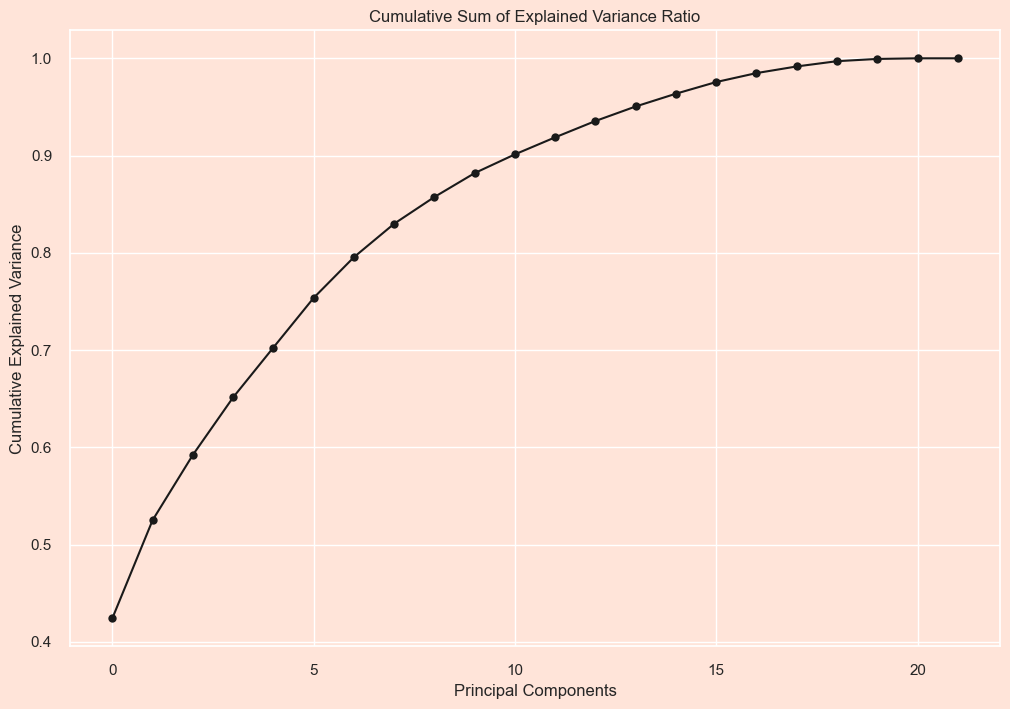

In [17]:
cumsum_pca = np.cumsum(deco_pca.explained_variance_ratio_)
plt.plot(cumsum_pca, linestyle='-', marker='o', color="k")
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()      

**From the chart above, I chose Principal Component = 11**

In [18]:
deco_pca = PCA(n_components=11)
deco_pca.fit(scaled_data)
data_pca_final = deco_pca.transform(scaled_data)

In [19]:
len(deco_pca.explained_variance_ratio_), sum(deco_pca.explained_variance_ratio_)

(11, np.float64(0.9012358895437163))

In [20]:
columns_name = ["col"+str(i) for i in range(1,12)] ## list comprehension Contains column names
data_pca_final = pd.DataFrame(data_pca_final, columns=(columns_name))

In [21]:
data_pca_final.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,4.679482,0.818445,0.811301,-0.470864,0.482560,-1.073886,1.080451,0.132266,0.804951,-0.154345,-0.170197
1,-2.143009,-0.978834,-0.423638,0.121151,-0.206887,0.813757,0.184513,0.207483,0.775722,-0.438854,0.113679
2,1.440350,-0.488751,-0.180803,0.431912,0.445780,0.011351,0.748987,1.351057,-0.652356,-0.166712,-0.556251
3,-2.175752,-0.961360,0.176838,0.174282,-0.089113,0.629093,0.299922,-0.518280,-0.784210,-0.179893,-0.230192
4,-0.137429,0.141801,0.383903,-0.514792,0.376567,1.643434,0.620036,-0.641796,-0.308710,1.100175,0.084895


In [22]:
data_pca_final.to_csv("output/04_model_data.csv", index=False)

In [23]:
df_final.to_csv("output/final_data.csv", index=False)

---------------